In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("./dataset/AmazonReviews/train.csv", names=["polarity", "title", "text"])

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the NLTK resources
nltk.download('stopwords')
nltr=nltk.download('wordnet')

# Preprocess the text
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)         # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)                 # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)          # Remove digits
    text = text.lower()                                 # Convert to lowercase
    words = text.split()                                # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Remove stopwords and lemmatize
    return ' '.join(words)                             # Join the words back into a string

# Apply the preprocessing to the text column
data["text"] = data["text"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /Users/parth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/parth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.model_selection import train_test_split

X = data["text"]
y = data["polarity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.86      0.86    359759
           2       0.86      0.87      0.87    360241

    accuracy                           0.86    720000
   macro avg       0.86      0.86      0.86    720000
weighted avg       0.86      0.86      0.86    720000



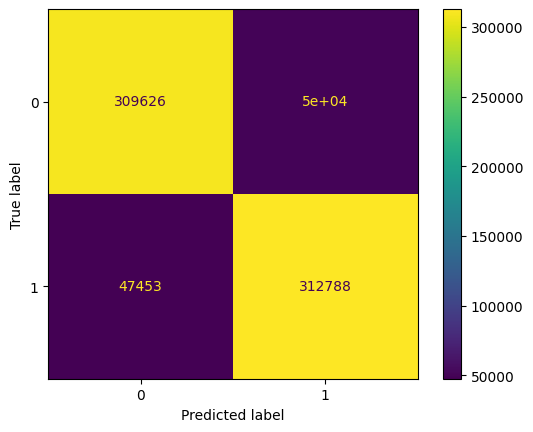

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()